<a href="https://colab.research.google.com/github/mobarakol/tutorial_notebooks/blob/main/blending_img_mask_fig.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [49]:
import gdown
url = 'https://drive.google.com/uc?id=1k4mMuq-s_Ty2rl5IXK6olkmMSOK8xPhB'
gdown.download(url,'img_mask.zip',quiet=True)
!unzip -q img_mask.zip

replace img_mask/img.png? [y]es, [n]o, [A]ll, [N]one, [r]ename: N


[0 1 4]


<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

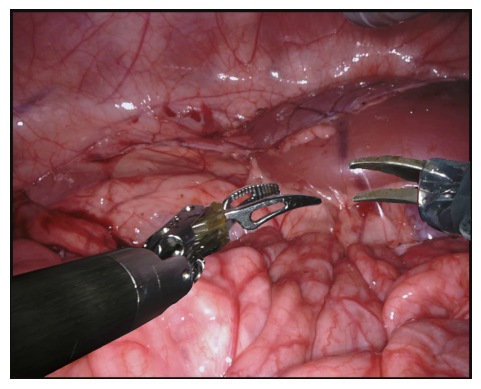

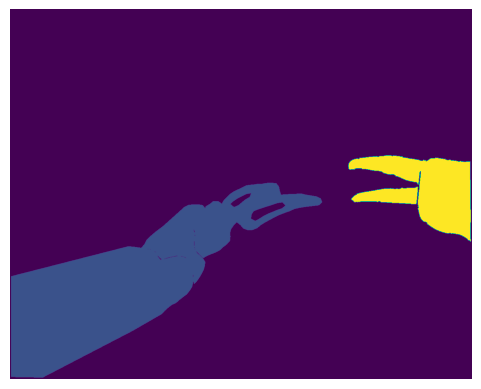

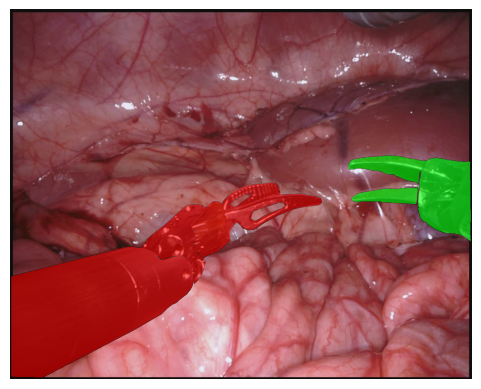

In [50]:
from PIL import Image
import matplotlib.pyplot as plt
import numpy as np
import cv2
plt.figure().clear()
plt.figure().clear()
plt.clf()

colors = [(0, 0, 0),   # Background (black)
          (255, 0, 0), # Class 1 (red)
          (0, 255, 0), # Class 2 (green)
          (0, 0, 255), # Class 3 (blue)
          (255, 255, 0), # Class 4 (yellow)
          (255, 0, 255), # Class 5 (magenta)
          (0, 255, 255), # Class 6 (cyan)
          (128, 128, 128)] # Class 7 (gray)


def show_mask(mask, ax, color):
    color = np.array([color[0]/255, color[1]/255, color[2]/255, 0.6])
    h, w = mask.shape[:2]
    mask_image = mask.reshape(h, w, 1) * color.reshape(1, 1, -1)
    ax.imshow(mask_image)


img = cv2.imread('img_mask/img.png')
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
plt.figure()
plt.axis('off')
plt.imshow(img)


mask = cv2.imread('img_mask/mask.png', 0)

plt.figure()
plt.axis('off')
plt.imshow(mask)

plt.figure()
plt.axis('off')
plt.imshow(img)

classes = np.unique(mask)
print(classes)
for i, cls in enumerate(classes):
    if cls == 0:
        continue
    show_mask(mask == cls, plt.gca(), color=colors[i])

[0 1 4]


<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

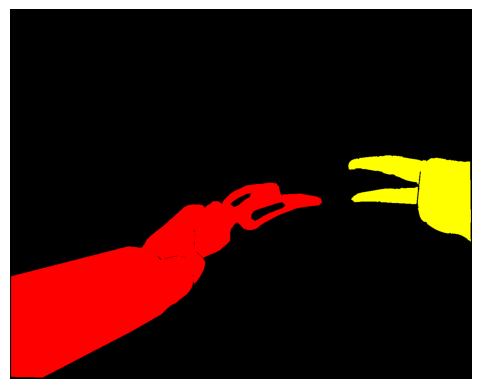

In [35]:
from PIL import Image
import matplotlib.pyplot as plt
import numpy as np
import cv2
plt.figure().clear()
plt.figure().clear()
plt.clf()

colors = [(0, 0, 0),   # Background (black)
          (255, 0, 0), # Class 1 (red)
          (0, 255, 0), # Class 2 (green)
          (0, 0, 255), # Class 3 (blue)
          (255, 255, 0), # Class 4 (yellow)
          (255, 0, 255), # Class 5 (magenta)
          (0, 255, 255), # Class 6 (cyan)
          (128, 128, 128)] # Class 7 (gray)


def show_mask(mask, ax, color, cls):
    color = np.array([color[0]/255, color[1]/255, color[2]/255, 0.6])
    h, w = mask.shape[:2]
    mask_image = mask.reshape(h, w, 1) * color.reshape(1, 1, -1)
    ax.imshow(mask_image)

mask = cv2.imread('img_mask/mask.png', 0)

classes = np.unique(mask)
r_mask = np.zeros((mask.shape[0], mask.shape[1]))
g_mask = np.zeros((mask.shape[0], mask.shape[1]))
b_mask = np.zeros((mask.shape[0], mask.shape[1]))

print(classes)
for i, cls in enumerate(classes):
    if cls == 0:
        continue
    r_mask[mask==cls] = colors[cls][0];
    g_mask[mask==cls] = colors[cls][1];
    b_mask[mask==cls] = colors[cls][2]

plt.figure()
plt.axis('off')
plt.imshow(np.array([r_mask,g_mask,b_mask]).transpose(1,2,0))

[0 3 6]


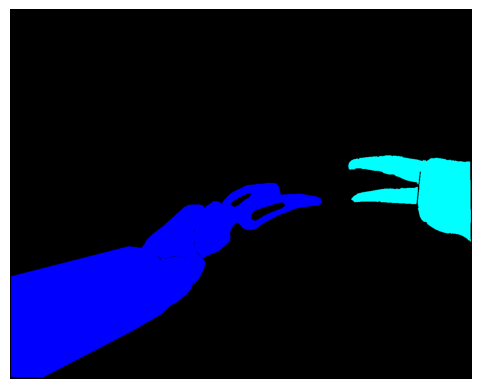

In [39]:
mask = cv2.imread('img_mask/mask.png', 0)
mask[mask==1] = 3
mask[mask==4] = 6
classes = np.unique(mask)
r_mask = np.zeros((mask.shape[0], mask.shape[1]))
g_mask = np.zeros((mask.shape[0], mask.shape[1]))
b_mask = np.zeros((mask.shape[0], mask.shape[1]))

print(classes)
for i, cls in enumerate(classes):
    if cls == 0:
        continue
    r_mask[mask==cls] = colors[cls][0];
    g_mask[mask==cls] = colors[cls][1];
    b_mask[mask==cls] = colors[cls][2]

plt.figure()
plt.axis('off')
plt.imshow(np.array([r_mask,g_mask,b_mask]).transpose(1,2,0))